In [8]:
import torch
import numpy as np
import pandas as pd
import os
import struct
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
import matplotlib.pyplot as plt

In [9]:
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.layer1 = nn.Linear(28*28, 128)
        self.layer2 = nn.Linear(128, 256)
        self.output_layer = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
Y_train = train["label"].values
X_train = train.drop(labels=["label"], axis=1).values
Y_test = test["label"].values
X_test = test.drop(labels=["label"], axis=1).values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
X_train_tensor = torch.Tensor(X_train).view(-1, 1, 28, 28)
X_test_tensor = torch.Tensor(X_test).view(-1, 1, 28, 28)
Y_train_tensor = torch.LongTensor(Y_train)
Y_test_tensor = torch.LongTensor(Y_test)

In [13]:
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [14]:
model = FCNN()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 1/20, Loss: 0.28677971307426564, Accuracy: 91.7%
Epoch 2/20, Loss: 0.11050571557154247, Accuracy: 96.67333333333333%
Epoch 3/20, Loss: 0.07658815298026908, Accuracy: 97.56666666666666%
Epoch 4/20, Loss: 0.057462847541157866, Accuracy: 98.175%
Epoch 5/20, Loss: 0.043954348234685144, Accuracy: 98.51333333333334%
Epoch 6/20, Loss: 0.035644828701510464, Accuracy: 98.855%
Epoch 7/20, Loss: 0.028228036298449815, Accuracy: 99.09%
Epoch 8/20, Loss: 0.02601788686748819, Accuracy: 99.11166666666666%
Epoch 9/20, Loss: 0.02038170077242678, Accuracy: 99.32666666666667%
Epoch 10/20, Loss: 0.01826158350718918, Accuracy: 99.36666666666666%
Epoch 11/20, Loss: 0.015293135778820351, Accuracy: 99.48%
Epoch 12/20, Loss: 0.015247180712116448, Accuracy: 99.46333333333334%
Epoch 13/20, Loss: 0.014386835229869206, Accuracy: 99.52666666666667%
Epoch 14/20, Loss: 0.011554227489404939, Accuracy: 99.62%
Epoch 15/20, Loss: 0.0131199369468131, Accuracy: 99.54166666666667%
Epoch 16/20, Loss: 0.01248941577087015

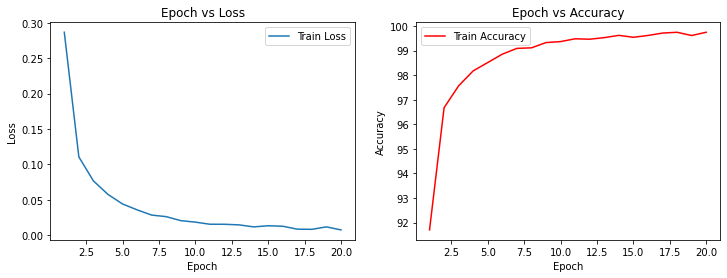

In [15]:
import matplotlib.pyplot as plt

num_epochs = 20
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%')

# 绘制训练损失
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()

# 绘制训练准确率
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()

plt.show()


In [20]:
def compute_metrics(true_labels, predicted_labels):
    # 转换为NumPy数组以便计算
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)
    
    # 计算准确率
    accuracy = np.sum(predicted_labels == true_labels) / len(true_labels)
    
    return accuracy
num_epochs = 10  # 根据需要调整
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)        
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()
    
    # 在训练结束后评估准确率
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in train_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = compute_metrics(all_labels, all_preds)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}')


Epoch 1/10, Loss: 0.010799678790961402, Accuracy: 0.9975
Epoch 2/10, Loss: 0.006650195909501728, Accuracy: 0.9979166666666667
Epoch 3/10, Loss: 0.007566203114288376, Accuracy: 0.9957333333333334
Epoch 4/10, Loss: 0.009141639819865391, Accuracy: 0.9986833333333334
Epoch 5/10, Loss: 0.007833118835692963, Accuracy: 0.9975833333333334
Epoch 6/10, Loss: 0.006260787476786484, Accuracy: 0.9971
Epoch 7/10, Loss: 0.006090993919044264, Accuracy: 0.9961833333333333
Epoch 8/10, Loss: 0.009522707662587442, Accuracy: 0.99875
Epoch 9/10, Loss: 0.005273386395698307, Accuracy: 0.9983166666666666
Epoch 10/10, Loss: 0.007759804771695992, Accuracy: 0.9967


In [21]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 97.99%
